In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [46]:
tifs = [
    '/mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00007.tif',
    '/mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00003.tif',
    '/mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00004.tif',
    '/mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00011.tif'
]

In [47]:
mov = lbmio.load_and_stitch_tifs(tifs,planes = n.arange(15), n_ch=15, fix_fastZ = 556)

Less than 30 channels specified, not converting plane ids to channel ids
Loading /mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00007.tif
Loading /mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00003.tif
Loading /mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00004.tif
Loading /mnt/zaru-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00011.tif
Loaded 4 files, total 8.89 GB


In [48]:
im3d = mov.mean(axis=1)

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7eff26660c10>)

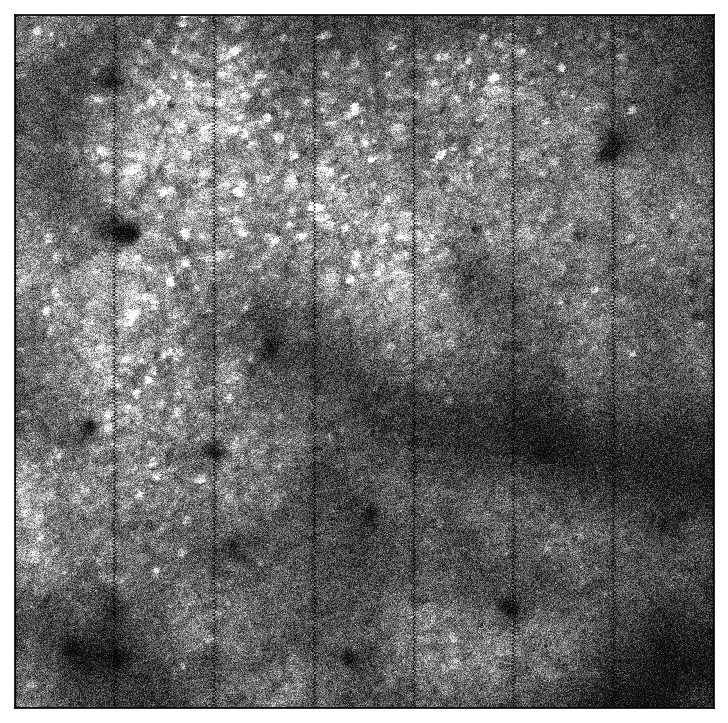

In [49]:
tfu.show_tif(im3d[10])

In [50]:
tvecs = n.concatenate([[[0,0]], utils.get_shifts_3d(im3d.astype(int), filter_pcorr = 1,
                                                n_procs = 15)])

15


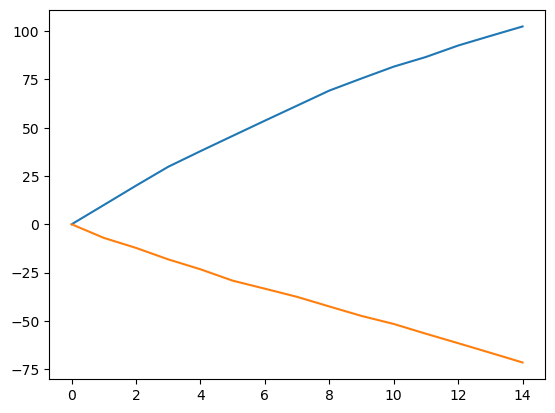

In [51]:
plt.plot(tvecs)

In [52]:

__, xs = lbmio.load_and_stitch_full_tif_mp(tifs[0], channels=n.arange(1), get_roi_start_pix=True, 
                                           n_ch=15, fix_fastZ=556)

Text(0.5, 1.0, 'Fuse shift: 22')

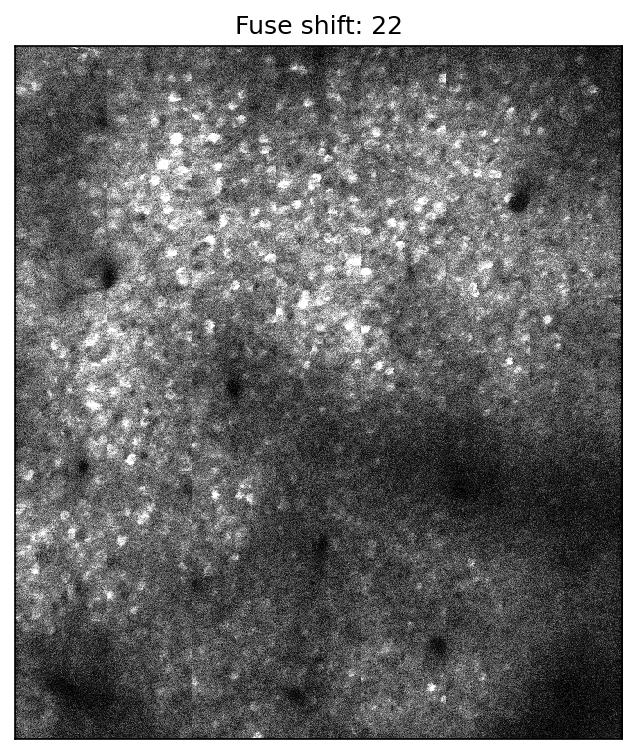

In [67]:
fuse22 = utils.pad_and_fuse(im3d[:,n.newaxis],n.zeros((15,2)), fuse_shift = 22, xs = xs)
tfu.show_tif(fuse22[0][8,0])
plt.title("Fuse shift: 22")

In [60]:
fuse8 = utils.pad_and_fuse(im3d[:,n.newaxis],n.zeros((15,2)), fuse_shift = 8, xs = xs)

Text(0.5, 1.0, 'Fuse shift: 8')

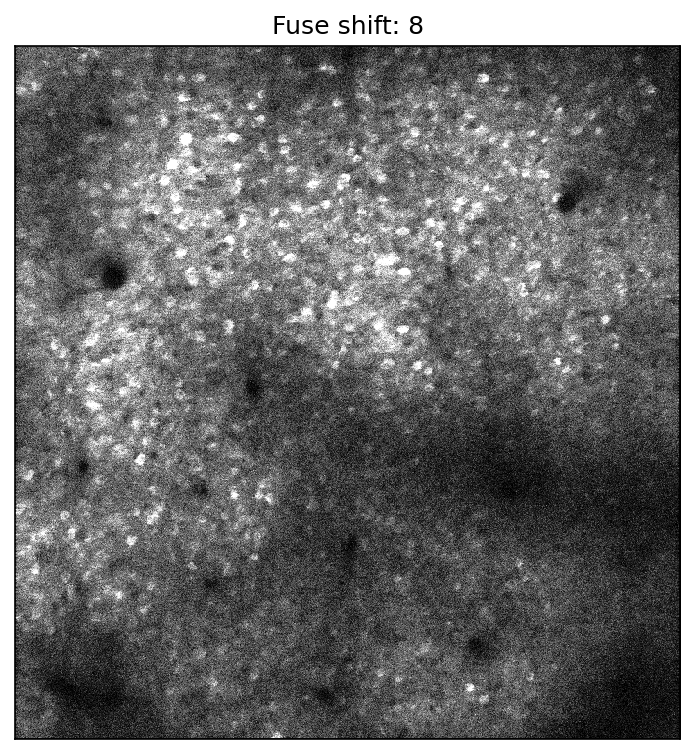

In [65]:
tfu.show_tif(fuse8[0][8,0])
plt.title("Fuse shift: 8")